In [4]:
%pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/2.1 MB 6.7 MB/s eta 0:00:01
     ----------------------- ---------------- 1.2/2.1 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  2.0/2.1 MB 16.3 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
  Using cached Fiona-1.9.1-cp310-cp310-win_amd64.whl (21.9 MB)
  Using cached shapely-2.0.1-cp310-cp310-win_amd64.whl (1.4 MB)
  Using cached pyproj-3.4.1-cp310-cp310-win_amd64.whl (4.8 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
police_district_df = gpd.read_file("boston-massachusetts-police-districts.shp")

# Print the first few rows of the GeoDataFrame
print(police_district_df)

    DISTRICT_1 DISTRICT DISTRICT_2        STArea BPDGIS_GIS   ID  \
0          1.0       A1         01  4.445582e+07          A   A1   
1          6.0       C6         06  1.237108e+08          C   C6   
2          4.0       D4         04  7.000553e+07          D   D4   
3         14.0      D14         14  1.236253e+08          D  D14   
4         13.0      E13         13  1.119417e+08          E  E13   
5          5.0       E5         05  1.910675e+08          E   E5   
6          3.0       B3         03  9.315668e+07          B   B3   
7         18.0      E18         18  1.632845e+08          E  E18   
8          2.0       B2         02  1.196784e+08          B   B2   
9         15.0      A15         15  3.798284e+07          A  A15   
10         7.0       A7         07  1.401151e+08          A   A7   
11        11.0      C11         11  1.329178e+08          C  C11   

         STLength                                           geometry  
0    49080.786370  POLYGON ((777233.200 2959

In [39]:
print("police_district_df shape: ", police_district_df.shape)
print("police_district_df cordinate reference system: ",police_district_df.crs)

police_district_df shape:  (12, 8)
police_district_df cordinate reference system:  EPSG:2249


0      Annotation(774774, 2.95581e+06, 'A1')
1      Annotation(779515, 2.94735e+06, 'C6')
2      Annotation(768815, 2.95072e+06, 'D4')
3     Annotation(751949, 2.95346e+06, 'D14')
4     Annotation(760368, 2.93752e+06, 'E13')
5      Annotation(749942, 2.92799e+06, 'E5')
6      Annotation(767912, 2.92856e+06, 'B3')
7     Annotation(757735, 2.91985e+06, 'E18')
8      Annotation(767499, 2.94185e+06, 'B2')
9     Annotation(774029, 2.96355e+06, 'A15')
10     Annotation(787990, 2.96071e+06, 'A7')
11    Annotation(777341, 2.93343e+06, 'C11')
dtype: object

<Figure size 640x480 with 0 Axes>

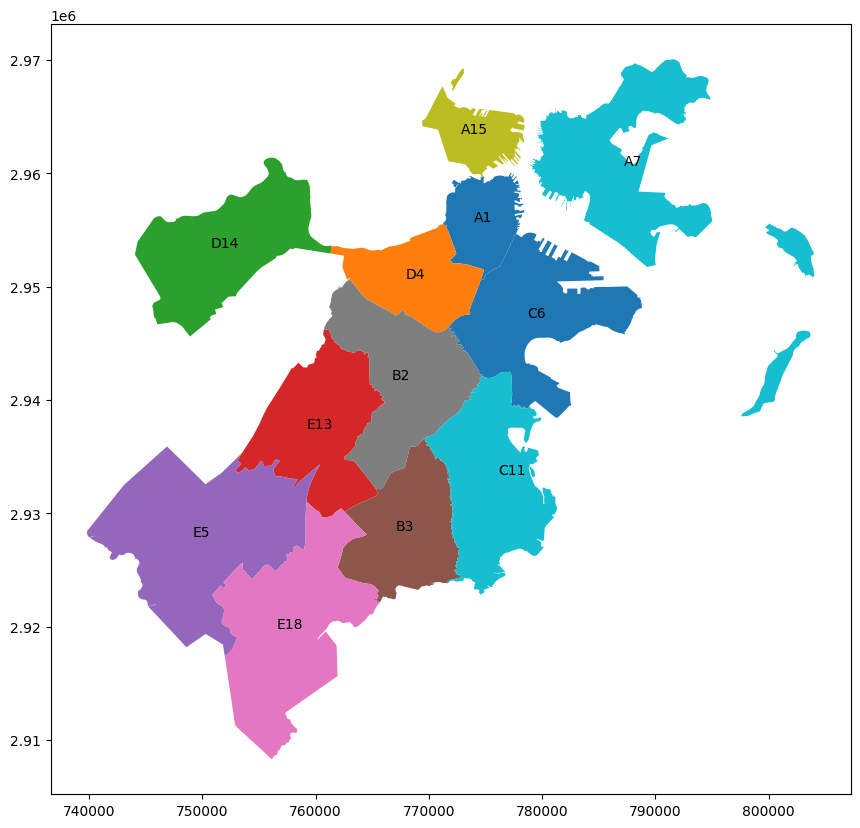

In [36]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
police_district_df.plot(ax=ax, column='geometry')
police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

In [37]:
# Read the shapefile
city_council_district_df = gpd.read_file("City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")

# Print the first few rows of the GeoDataFrame
print(city_council_district_df)

   FID    LONGNAME SHORTNAME  DISTRICT       COLOR  TOTAL  TARGET_DEV  \
0    1  District 1        D1         1  -851848832  76830        1758   
1    2  District 2        D2         2   465990528  77466        2394   
2    3  District 3        D3         3   494969216  73285       -1787   
3    4  District 4        D4         4      -65408  72917       -2155   
4    5  District 5        D5         5   412292224  75436         364   
5    6  District 6        D6         6  1971620992  76523        1451   
6    7  District 7        D7         7  1946148736  72147       -2925   
7    8  District 8        D8         8   639511936  76370        1298   
8    9  District 9        D9         9  -119742707  74673        -399   

   TARGET_D_1  TOTAL18  TOTALHISP  ...  BLACK  AIAN  ASIAN  HPI  OTHER  MLTMN  \
0        2.34    64257      24552  ...   3637   783   5080   50  20935   1689   
1        3.19    70183       6640  ...   4520   269  13604   55   4893   1005   
2       -2.38    60834    

In [38]:
print("city_council_district_df shape: ", city_council_district_df.shape)
print("city_council_district_df coordinate reference system: ",city_council_district_df.crs)

city_council_district_df shape:  (9, 38)
city_council_district_df coordinate reference system:  EPSG:4326


In [41]:
# reproject the coordinate system to police district coordinate system
city_council_district_df = city_council_district_df.to_crs("EPSG:2249")

0    Annotation(784827, 2.95999e+06, 'D1')
1    Annotation(783206, 2.94961e+06, 'D2')
2    Annotation(811439, 2.95211e+06, 'D3')
3    Annotation(771203, 2.92994e+06, 'D4')
4     Annotation(758424, 2.9219e+06, 'D5')
5    Annotation(753316, 2.93202e+06, 'D6')
6    Annotation(767892, 2.94193e+06, 'D7')
7    Annotation(767164, 2.95244e+06, 'D8')
8     Annotation(751872, 2.9536e+06, 'D9')
dtype: object

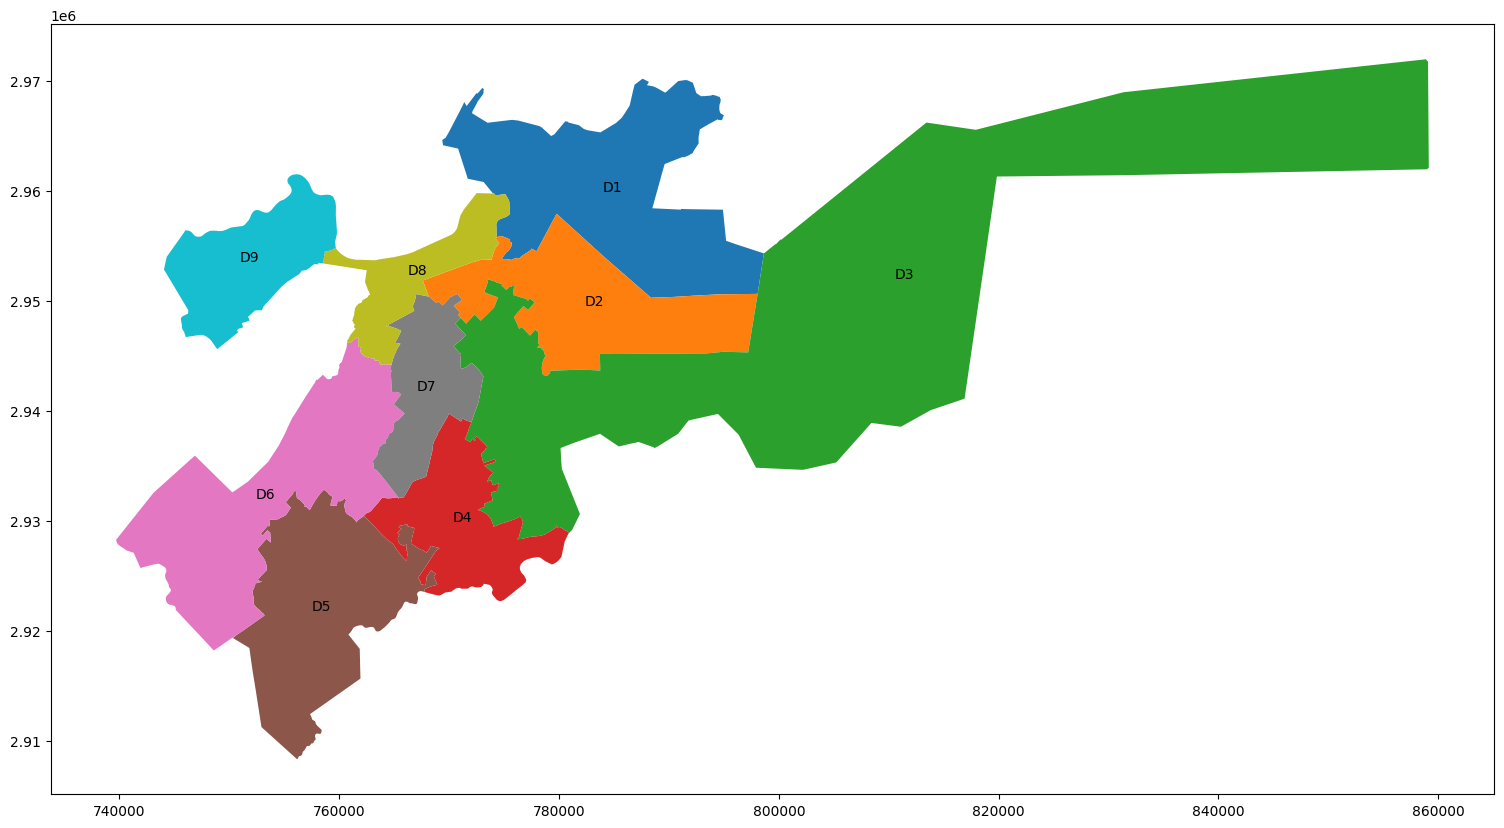

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
city_council_district_df.plot(ax=ax, column='geometry')
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

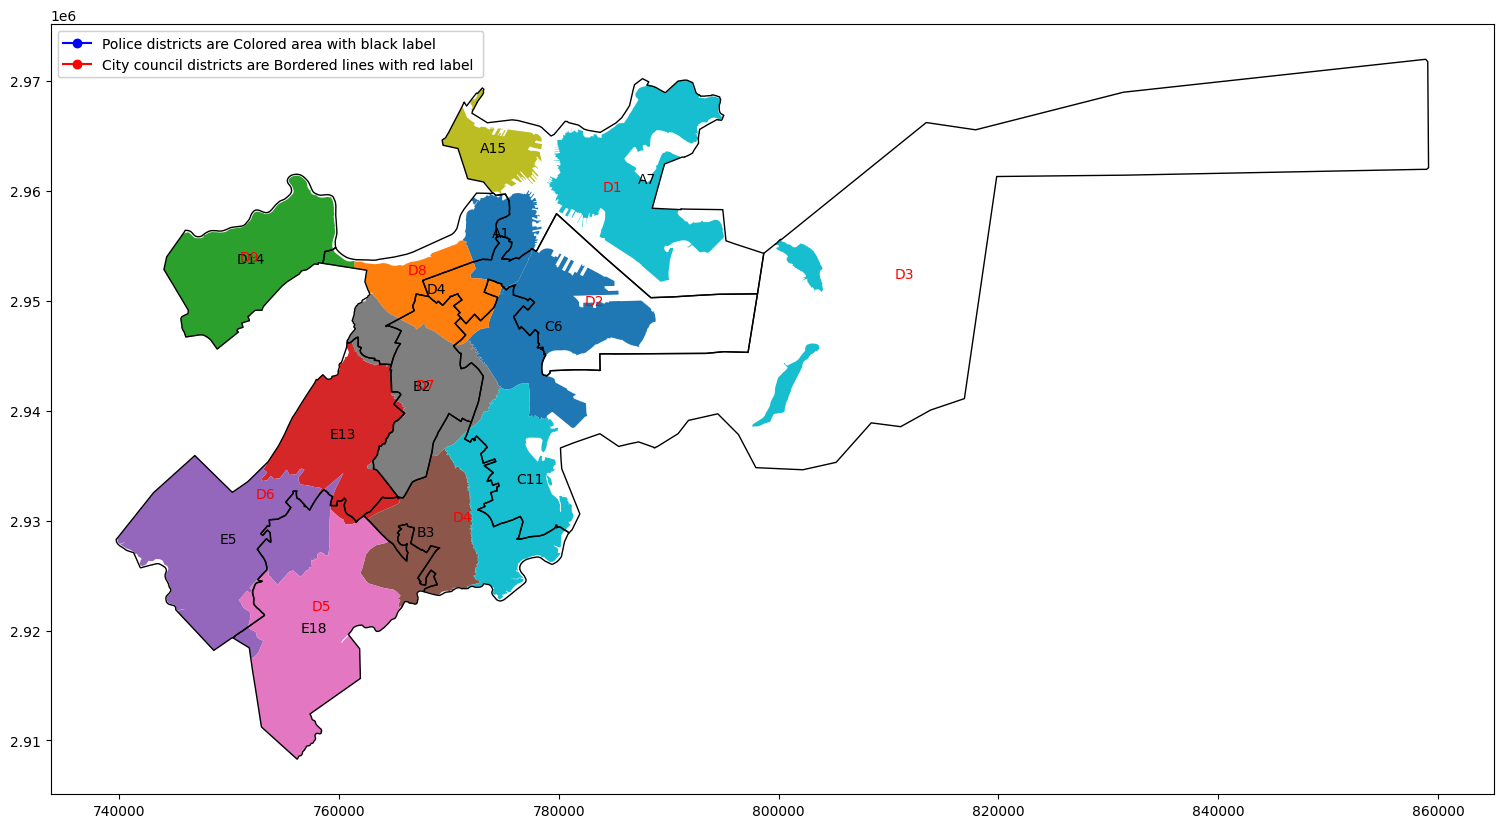

In [55]:

'''Plotting both police district and city councli on one figure'''

# fig, ax = plt.subplots(figsize=(20, 10))

# Plot gdf
# police_district_df.plot(ax=ax, column='geometry')
# police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# # Plot gdf1 on the same axis
# city_council_district_df.plot(ax=ax, column='geometry')
# city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# plt.show()

'''
#  Plotting both police district and city councli on one figure
#  Police districts are displayed using colored area
#  City council are displayed using boundry lines
'''
fig, ax = plt.subplots(figsize=(20, 10))

# Plot police districts
police_district_plot = police_district_df.plot(ax=ax, column='geometry', label="Police Districts")
police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# Plot city council districts
city_council_district_plot = city_council_district_df.plot(ax=ax, facecolor='none', edgecolor='black', label="City Council Districts")
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center', color='red'), axis=1)

# Add legend

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Police districts are Colored area with black label '),
                  Line2D([0], [0], marker='o', color='red', label='City council districts are Bordered lines with red label ')]
legend = ax.legend(handles=legend_elements, loc='upper left')

# Add the legend to the plot
ax.add_artist(legend)

plt.show()



## Questions

1. According to above figure there are 12 police districs and 9 city council districts. And D4 for police district and D4 of city council district are different zones. Is this correct?
